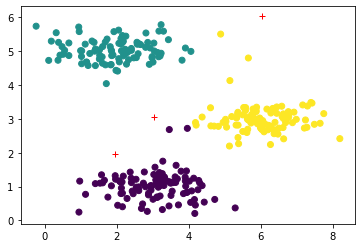

In [22]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = sio.loadmat('ex7data2.mat')
X = data['X']
x1,x2 = X[:,0],X[:,1]
km = KMeans(n_clusters=3,n_init=50,max_iter=1000).fit(X)
labels = km.labels_
cc = km.cluster_centers_

plt.scatter(x1,x2,c=labels)
plt.plot(cc[:,0],cc[:,0],'r+')

In [63]:
#------image compression using k-means
import imageio

img = imageio.imread('bird_small.png') # image is imported as 3D matrix of type 'uint8'
img = np.asarray(img,dtype='int')  # convert from uint8 to integer
l,m,n = img.shape
X2 = img.reshape(l*m,n)
km2 = KMeans(n_clusters=12,n_init=50,max_iter=1000).fit(X2) # reduce colors from 24 to 12 using clustering
labels2 = km2.labels_ 
cc2 = km2.cluster_centers_ 

Text(0.5, 1.0, 'compressed')

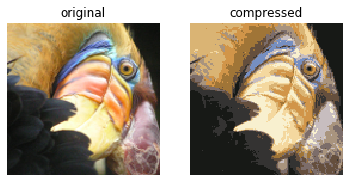

In [64]:
#--compress image by assigning data points to clusters
Xcomp = np.copy(X2)
for i in range(l*m):
    Xcomp[i] = cc2[labels2[i]]
img_comp = np.asarray(Xcomp.reshape(l,m,n),dtype='uint8')

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax2.imshow(img_comp)
ax1.axis('off')
ax1.set_title('original')
ax2.axis('off')
ax2.set_title('compressed')